In [51]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import MobileNetV2


import time

In [24]:
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [25]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [26]:
x= vgg_model.output
outlayer= Dense(10, activation= 'softmax')(x)
outlayer= Flatten()(outlayer)
model1= keras.Model(inputs=vgg_model.input, outputs= outlayer)

In [27]:
for layer in vgg_model.layers:
     layer.trainable = False

In [28]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [29]:
start= time.time()
history_v= model1.fit(x_train, y_train, batch_size= 256, epochs=10, verbose=1,validation_data=(x_test, y_test))
v_time= time.time()- start

Epoch 1/10
196/196 [==============================] - 8s 39ms/step - loss: 0.2740 - accuracy: 0.3604 - val_loss: 0.2411 - val_accuracy: 0.4630
Epoch 2/10
196/196 [==============================] - 7s 37ms/step - loss: 0.2290 - accuracy: 0.4973 - val_loss: 0.2230 - val_accuracy: 0.5070
Epoch 3/10
196/196 [==============================] - 7s 38ms/step - loss: 0.2159 - accuracy: 0.5278 - val_loss: 0.2144 - val_accuracy: 0.5237
Epoch 4/10
196/196 [==============================] - 7s 37ms/step - loss: 0.2086 - accuracy: 0.5452 - val_loss: 0.2091 - val_accuracy: 0.5380
Epoch 5/10
196/196 [==============================] - 7s 37ms/step - loss: 0.2038 - accuracy: 0.5575 - val_loss: 0.2056 - val_accuracy: 0.5453
Epoch 6/10
196/196 [==============================] - 7s 38ms/step - loss: 0.2001 - accuracy: 0.5668 - val_loss: 0.2028 - val_accuracy: 0.5527
Epoch 7/10
196/196 [==============================] - 7s 37ms/step - loss: 0.1974 - accuracy: 0.5716 - val_loss: 0.2008 - val_accuracy: 0.5563

In [30]:
r50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [31]:
x= r50_model.output
reslayer= Dense(10, activation= 'softmax')(x)
reslayer= Flatten()(reslayer)
model2= keras.Model(inputs=r50_model.input, outputs= reslayer)

for layer in r50_model.layers:
     layer.trainable = False

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                            

In [32]:
start= time.time()
history_r= model2.fit(x_train, y_train, batch_size= 256, epochs=10, verbose=1,validation_data=(x_test, y_test))
r_time= time.time()- start

Epoch 1/10
196/196 [==============================] - 11s 41ms/step - loss: 0.3187 - accuracy: 0.1907 - val_loss: 0.3019 - val_accuracy: 0.2311
Epoch 2/10
196/196 [==============================] - 7s 35ms/step - loss: 0.2957 - accuracy: 0.2700 - val_loss: 0.2884 - val_accuracy: 0.3031
Epoch 3/10
196/196 [==============================] - 7s 35ms/step - loss: 0.2877 - accuracy: 0.2994 - val_loss: 0.2826 - val_accuracy: 0.3222
Epoch 4/10
196/196 [==============================] - 7s 35ms/step - loss: 0.2826 - accuracy: 0.3142 - val_loss: 0.2826 - val_accuracy: 0.2910
Epoch 5/10
196/196 [==============================] - 7s 35ms/step - loss: 0.2793 - accuracy: 0.3259 - val_loss: 0.2765 - val_accuracy: 0.3365
Epoch 6/10
196/196 [==============================] - 7s 35ms/step - loss: 0.2761 - accuracy: 0.3382 - val_loss: 0.2737 - val_accuracy: 0.3439
Epoch 7/10
196/196 [==============================] - 7s 35ms/step - loss: 0.2740 - accuracy: 0.3423 - val_loss: 0.2713 - val_accuracy: 0.349

In [33]:
mn_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
x= mn_model.output
mnlayer= Dense(10, activation= 'softmax')(x)
mnlayer= Flatten()(mnlayer)
model3= keras.Model(inputs=mn_model.input, outputs= mnlayer)

for layer in mn_model.layers:
     layer.trainable = False

model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 16, 16, 32)   864         ['input_8[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 16, 16, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 16, 16, 32)   0           ['bn_Conv1[0][0]']               
                                                                                            

In [34]:
start= time.time()
history_m= model3.fit(x_train, y_train, batch_size= 256, epochs=10, verbose=1,validation_data=(x_test, y_test))
m_time= time.time()- start

Epoch 1/10
196/196 [==============================] - 7s 26ms/step - loss: 0.3106 - accuracy: 0.2454 - val_loss: 0.3013 - val_accuracy: 0.2814
Epoch 2/10
196/196 [==============================] - 4s 21ms/step - loss: 0.2959 - accuracy: 0.2929 - val_loss: 0.2923 - val_accuracy: 0.2898
Epoch 3/10
196/196 [==============================] - 4s 21ms/step - loss: 0.2891 - accuracy: 0.3009 - val_loss: 0.2878 - val_accuracy: 0.2953
Epoch 4/10
196/196 [==============================] - 4s 21ms/step - loss: 0.2854 - accuracy: 0.3071 - val_loss: 0.2852 - val_accuracy: 0.3014
Epoch 5/10
196/196 [==============================] - 4s 21ms/step - loss: 0.2830 - accuracy: 0.3114 - val_loss: 0.2835 - val_accuracy: 0.3045
Epoch 6/10
196/196 [==============================] - 4s 21ms/step - loss: 0.2814 - accuracy: 0.3146 - val_loss: 0.2823 - val_accuracy: 0.3063
Epoch 7/10
196/196 [==============================] - 4s 20ms/step - loss: 0.2802 - accuracy: 0.3166 - val_loss: 0.2814 - val_accuracy: 0.3083

In [45]:
from tensorflow.keras.applications import EfficientNetB0

In [47]:
mn_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
x= mn_model.output
mnlayer= Dense(10, activation= 'softmax')(x)
mnlayer= Flatten()(mnlayer)
model_eff= keras.Model(inputs=mn_model.input, outputs= mnlayer)

for layer in mn_model.layers:
     layer.trainable = False

model_eff.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_eff.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 rescaling_1 (Rescaling)        (None, 32, 32, 3)    0           ['input_11[0][0]']               
                                                                                                  
 normalization_1 (Normalization  (None, 32, 32, 3)   7           ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                                  
 tf.math.truediv_1 (TFOpLambda)  (None, 32, 32, 3)   0           ['normalization_1[0][0]']  

In [52]:
start=time.time()
history_eff= model_eff.fit(x_train, y_train, batch_size= 256, epochs=10, verbose=1,validation_data=(x_test, y_test))
eff_time= time.time()- start

Epoch 1/10
196/196 [==============================] - 13s 38ms/step - loss: 0.3262 - accuracy: 0.1022 - val_loss: 0.3264 - val_accuracy: 0.1000
Epoch 2/10
196/196 [==============================] - 7s 34ms/step - loss: 0.3261 - accuracy: 0.1028 - val_loss: 0.3263 - val_accuracy: 0.1000
Epoch 3/10
196/196 [==============================] - 6s 29ms/step - loss: 0.3261 - accuracy: 0.1031 - val_loss: 0.3252 - val_accuracy: 0.1000
Epoch 4/10
196/196 [==============================] - 7s 35ms/step - loss: 0.3258 - accuracy: 0.1050 - val_loss: 0.3258 - val_accuracy: 0.1000
Epoch 5/10
196/196 [==============================] - 7s 35ms/step - loss: 0.3258 - accuracy: 0.1064 - val_loss: 0.3266 - val_accuracy: 0.1000
Epoch 6/10
196/196 [==============================] - 6s 30ms/step - loss: 0.3261 - accuracy: 0.1058 - val_loss: 0.3252 - val_accuracy: 0.1005
Epoch 7/10
196/196 [==============================] - 7s 35ms/step - loss: 0.3257 - accuracy: 0.1060 - val_loss: 0.3264 - val_accuracy: 0.101

---
# Comparisons:
---

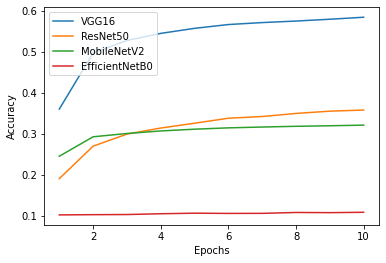

In [55]:
eps= [i for i in range(1, 11)]
plt.plot(eps, history_v.history['accuracy'], label= "VGG16")
plt.plot(eps, history_r.history['accuracy'], label= "ResNet50")
plt.plot(eps, history_m.history['accuracy'], label= "MobileNetV2")
plt.plot(eps, history_eff.history['accuracy'], label= "EfficientNetB0")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

VGG16 time: 75.48030829429626
ResNet50 time:  74.08568286895752
MobileNetV2 time:  45.146484375
EfficientNetB0 time:  72.09042167663574


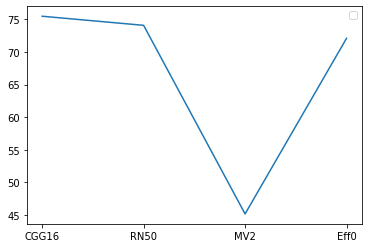

In [57]:
print("VGG16 time:", v_time)
print("ResNet50 time: ", r_time)
print("MobileNetV2 time: ", m_time)
print("EfficientNetB0 time: ", eff_time)
mods= ["CGG16", "RN50", "MV2","Eff0"]
time= [v_time, r_time, m_time,eff_time]
plt.plot(mods, time)
plt.legend()
plt.show()